In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
folder = os.path.join("C:\\", "qudi-hira", "saved_pulsed_assets", "waveform")
#os.listdir(folder)

a_ch0 is a null channel
a_ch1 is a null channel
a_ch2 is a null channel
a_ch3 is a null channel
d_ch0 is a null channel
d_ch1 is a null channel
d_ch2 has length 150
d_ch3 has length 150
d_ch4 has length 150
d_ch5 is a null channel


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
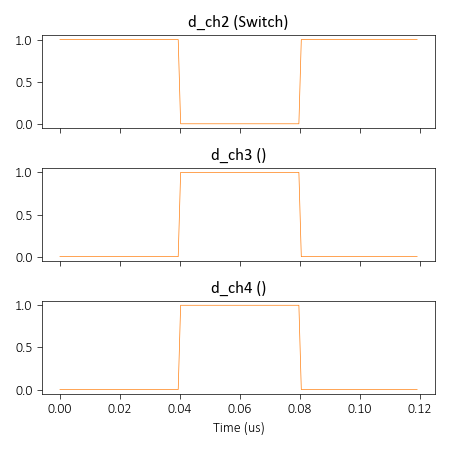

In [90]:
%matplotlib widget

# Enter name of pkl file without channel names
waveform_name = 'AWGTestEns'
sample_rate = 1.25e9

labels = {
    'a_ch0': "In-phase", 
    'a_ch1': "Quadrature", 
    'a_ch2': "", 
    'a_ch3': "", 
    'd_ch0': "Laser", 
    'd_ch1': "Readout", 
    'd_ch2': "Switch", 
    'd_ch3': "", 
    'd_ch4': "", 
    'd_ch5': "MW trigger"
}

# Initialize all channels to None
channels = dict.fromkeys(labels, None) 

for key in list(channels):
    try:
        filename = f"{waveform_name}_{key}.pkl"
        filepath = os.path.join(folder, filename)
        with open(filepath, 'rb') as f:
            channels[key] = pickle.load(f)
        if not np.any(channels[key]):
            # Delete channels with only zeros
            print(f"{key} is a null channel")
            del channels[key]  
        else:
            print(f"{key} has length {len(channels[key])}")
    except FileNotFoundError as exc:
        # Delete channels that don't exist on disk
        print(f"{key} not found") 
        del channels[key]


if len(channels) == 1: # Single channel plotting
    size_x, size_y = 8, 5
else:
    size_x, size_y = len(channels) * 1.5, len(channels) * 1.5

fig, ax = plt.subplots(nrows=len(channels), sharex=True, figsize=(size_x, size_y))

# Correct for matplotlib's (silly) behavior for single plots
if not isinstance(ax, np.ndarray): 
    ax = [ax]
lower, upper = 0, -1

for idx, key in enumerate(channels):
    #time_in_us = np.linspace(0, len(channels[key][:limit]) / 1.25e9, len(channels[key][limit:])) * 1e6
    time_in_us = np.linspace(0, len(channels[key][lower:upper]) / sample_rate, len(channels[key][lower:upper])) * 1e6
    
    if key.startswith('a_'):
        ax[idx].plot(time_in_us, channels[key][lower:upper], "-", linewidth=0.2, color="C0")
    elif key.startswith('d_ch1'):
        ax[idx].plot(time_in_us, channels[key][lower:upper], "-", linewidth=0.2, color="C0")
    else:
        ax[idx].plot(time_in_us, channels[key][lower:upper],"-", linewidth=0.5, color="C1")
    ax[idx].set_title(f'{key} ({labels[key]})')
    
ax[-1].set_xlabel("Time (us)")
fig.tight_layout()

#fig.savefig(os.path.join(folder, "pODMR.png"), dpi=600)